In [1]:
import numpy as np
from numpy.linalg import norm
from numpy.linalg import det
from math import sqrt

In [2]:
def cond_s(m: np.array):
    M_inv = np.linalg.inv(m)
    return norm(M_inv) * norm(m)

In [3]:
A = np.array([
    [2, 1],
    [1, 1]
])

In [4]:
cond_s(A)

7.000000000000001

In [5]:
square = lambda x: x ** 2

def cond_v(m: np.array):
    n = m.shape[0]
    acc = 1
    for i in range(n):
        acc = acc * sqrt(np.sum(square(m[i, :])))
    return acc / det(m)

cond_v(A)

3.1622776601683795

In [6]:
def cond_a(m: np.array):
    m_inv = np.linalg.inv(m)
    n = m.shape[0]
    result = norm(m[0, ]) * norm(m_inv[:, 0])
    for i in range(0, n):
        current = norm(m[i, :]) * norm(m_inv[:, i])
        if current > result:
            result = current
    return result

In [7]:
cond_a(A)

3.1622776601683795

In [8]:
from scipy.linalg import hilbert
import seaborn as sns
from tqdm import tqdm

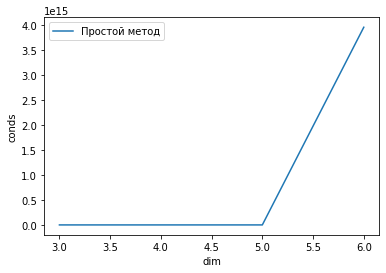

In [9]:
rounding = lambda x: round(x, 4)

def tests(cond):
    errors = []
    conds = []
    dim = []
    for N in range(3, 7):
        H = hilbert(N)
        right_solution = np.ones(N)
        b = np.matmul(H, right_solution)
        rounded_H = np.matrix.round(H, 4)
        rounded_b = np.matrix.round(b, 4)
        solution = np.linalg.solve(rounded_H, rounded_b)
        errors.append(norm(solution - right_solution))
        conds.append(cond(H))
        dim.append(N)
                     
    return errors, conds, dim
                     
errors, conds, dim = tests(cond_v)
ax1 = sns.lineplot(x=dim, y=conds, label='Простой метод')
st = ax1.set(xlabel='dim', ylabel='conds')

In [10]:
hilbert(3)

array([[1.        , 0.5       , 0.33333333],
       [0.5       , 0.33333333, 0.25      ],
       [0.33333333, 0.25      , 0.2       ]])

In [11]:
cond_v(hilbert(4))

937085.8716078639